# Homework 1

# A fashionable use case : clothing classification with `fashion-mnist`

- Load data with `fashion_mnist.load_data()` 
- There is no validation set, only a train and test set. 
- The labels correspond to the following things

| Label number | Label name  |
|--------------|-------------|
| 0	           | T-shirt/top |
| 1	           | Trouser     |
| 2	           | Pullover    |
| 3	           | Dress       |
| 4	           | Coat        |
| 5	           | Sandal      |
| 6	           | Shirt       |
| 7	           | Sneaker     |
| 8	           | Bag         |
| 9	           | Ankle boot  |

## Your job

- Try to understand the data, visualize it, like we did before with MNIST and noMNIST
- Create a neural network, using the ideas from before, that classify accurately the clothes on the test set
- You will need to build a validation set from the train set in order to tune hyperparameters

## We want to see the following things

- Some learning curves (training) and the accuracy obtained on the test set for the architecture you considered
- A discussion about the impact of the hyperparameters on the accuracy (size of the kernels, number of kernels, number of layers, etc.) 
- A clear comparison between your solutions (a table, or plots comparing the results obtained with different hyper-parameters and different architectures)
- An explanation of what kind of clothes are hard to distinguish and why (some visual explanation)
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did serious comparisons between different architectures
- You can do everything on your laptop, but it might be a good idea to use google `colab` (https://colab.research.google.com/) to get free access to a GPU
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Send your work using the following google form :

- https://forms.gle/G3Rwfcuj3MZfgXhr8

(you will need to create a google account if you don't have one).

## Example of architecture

As a start, you can use the following architecture (but you can and will change it) :

- Convolutional layer with 64 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 128 filters and 5 * 5 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Convolutional layer with 256 filters and 3 * 3 kernel sizes and 'relu' activation
- Max pooling with pool size 2 * 2
- Dropout with probability 0.25

- Dense layer with 256 units
- Dropout with probability 0.5
- Dense output layer with softmax activation

# Notre travail
###### Bétend Marie et Desmaretz  Félix
## Explorer les données
Nous commencons par charger les données et les visualiser.


## Charger les données

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/My\ Drive/Colab\ Notebooks

ls: cannot access 'drive/My Drive/Colab Notebooks': No such file or directory


In [ ]:
#Beaucoup d'import
import tensorflow
import os
import os
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import losses, optimizers
from tensorflow.keras import activations
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Number of classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28 

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
    test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
    test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

print('train_images shape:', train_images.shape)
print('test_images shape:', test_images.shape)
print('train_labels.shape: ', train_labels.shape)

print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')
print("input shape ",input_shape )

train_images shape: (60000, 28, 28, 1)
test_images shape: (10000, 28, 28, 1)
train_labels.shape:  (60000,)
60000 train samples
10000 test samples
input shape  (28, 28, 1)


### Visualiser les données

Nous jettons un coup d'oeil sur les premiers élements de notre jeu de données :

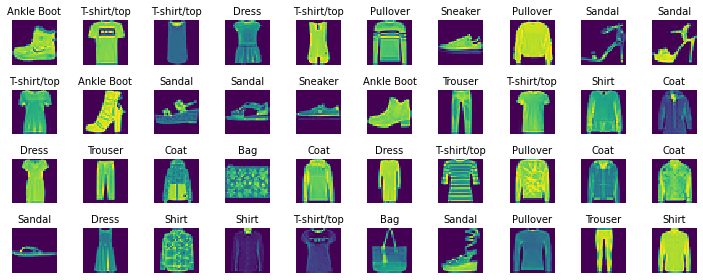

In [ ]:
#Visualisation des donnees 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

n_rows = 4
n_cols = 10
plt.figure(figsize=(10, 4))
for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(train_images[i].reshape(img_rows, img_cols),
               interpolation="none")
    plt.title('%s' % labels[train_labels[i]], fontsize=10)
    plt.axis("off")
plt.tight_layout()

In [ ]:
#Visualisation du tableau representant le premier élément
print(np.array2string(train_images[0].astype(np.int).reshape(img_rows, img_cols), 
                      max_line_width=150))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

Nous nous intéressons ensuite à la répartition des labels dans les données de test et d'entrainement.

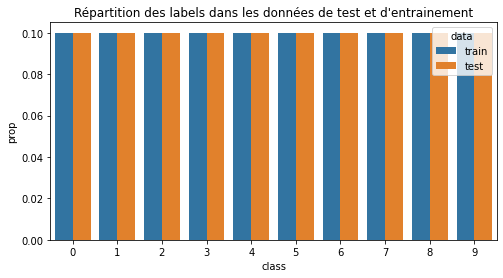

In [ ]:
#Repartition selon les labels 
y_counts = pd.DataFrame({
    'data': np.array(['train'] * num_classes + ['test'] * num_classes),
    'class': np.tile(np.arange(num_classes), 2),
    'prop': np.hstack([np.bincount(train_labels) / train_labels.shape[0], 
                         np.bincount(test_labels) / test_labels.shape[0]])
})

fig, ax = plt.subplots(figsize=(8, 4))
plt.title("Répartition des labels dans les données de test et d'entrainement")
sns.barplot(x='class', y='prop', hue='data', data=y_counts, ax=ax)
plt.show()

Tous les labels ont la même proportion dans les deux jeux de données.

### Préparation des données

Nous allons maintenant préparer les données pour nourrir nos réseaux de neurones.
On crée un jeu de validation pour pouvoir tester nos réseaux de neurones. Ce jeu représentera 20% des données d'entrainement initiales, que l'on extraye de celles-ci.

In [ ]:
# On sépare les données d'entrainement pour obtenir validate_images et validates_labels
train_images, validate_images, train_labels, validate_labels = train_test_split(train_images,train_labels,
                                                                               test_size = 0.2,random_state = 42)



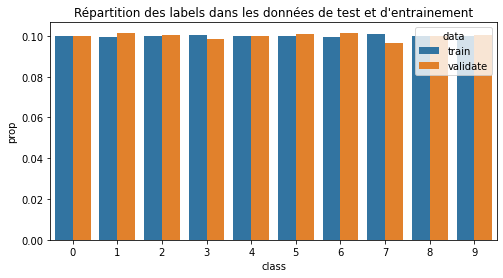

train_image.shape:  (48000, 28, 28, 1)


In [ ]:
# On vérifie que les proportions du jeu de validation sont correctes

#Si il y a des grosses divergences entre les données d'entrainement et de validation regénerer un nouveau set de validation en réexecutant le debut du notebook.
y_counts = pd.DataFrame({
    'data': np.array(['train'] * num_classes + ['validate'] * num_classes),
    'class': np.tile(np.arange(num_classes), 2),
    'prop': np.hstack([np.bincount(train_labels) / train_labels.shape[0], 
                         np.bincount(validate_labels) / validate_labels.shape[0]])
})

fig, ax = plt.subplots(figsize=(8, 4))
plt.title("Répartition des labels dans les données de test et d'entrainement")
sns.barplot(x='class', y='prop', hue='data', data=y_counts, ax=ax)
plt.show()
print("train_image.shape: ",train_images.shape)

Nous normalisation ensuite les images et passons les labels sous forme de vecteurs one-hot.

In [ ]:
# Normalisation des images
train_images= train_images/255
validate_images = validate_images/255
test_images = test_images/255

# Labels sous forme one-hot
train_labels = to_categorical(train_labels, num_classes)
validate_labels = to_categorical(validate_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


## Premier réseau

Nous allons faire tourner un premier réseau de neurones avec l'architecture fournie dans l'énoncé.

### Création et exécution du modèle

In [ ]:
models_path = "drive/My Drive/Colab Notebooks/models/"
# !mkdir models

def save_cnn(model, history, num):
    model.save(os.path.join(models_path, f'model{num}_cnn.h5'))
    with open(os.path.join(models_path, f'model{num}_cnn_history.pkl'), 'wb') as f:
        pkl.dump(history.history, f)

def load_cnn(num):
    model = load_model(os.path.join(models_path, f'model{num}_cnn.h5'))
    with open(os.path.join(models_path, f'model{num}_cnn_history.pkl'), 'rb') as f:
        history = pkl.load(f)
    return (model, history)

  

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

default_earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=0.0001,
  patience=2)

def run_cnn(model_cnn, batch_size=128, epochs=70, train_images=train_images, train_labels=train_labels, early_stopping=None):
  #on le fait tourner
  callbacks = [TensorBoard(log_dir='./logs_cnn/')]

  if not early_stopping is None:
    callbacks.append(early_stopping)

  history = model_cnn.fit(train_images, train_labels,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(validate_images, validate_labels),
                              callbacks=callbacks)
  score = model_cnn.evaluate(test_images, test_labels, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

  return history

In [ ]:
def to_plots(*histories_params):
  # get dimensions
  l = len(histories_params)

  # plot
  plt.figure(figsize=(10, 5 * l))

  for (i, (h, p)) in enumerate(histories_params):
    plt.subplot(l, 2, i * 2 + 1)
    plt.plot(h['loss'], label='Loss')
    plt.plot(h['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'Training - {p} - Loss Function')

    plt.subplot(l, 2, i * 2 + 2)
    plt.plot(h['accuracy'], label='Accuracy')
    plt.plot(h['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'Training - {p} - Accuracy')
  
  return plt

In [ ]:
# Fonction qui affiche les différents scores des modèles passés en paramètre
def print_scores(*models):
    for m in models:
        score = m.evaluate(test_images,test_labels,verbose=0)
        print('Test Loss :     {:.4f}'.format(score[0]))
        print('Test Accuracy : {:.4f}'.format(score[1]))
        yield score

In [ ]:
# Fonction qui nous permet de comparer les scores plus agréablement
def compare_scores(ref, *comps):
    print(f"=== reference === ")
    ref_score = next(print_scores(ref))
    for (i, m) in enumerate(comps):
      print(f"=== model {i} === ")
      print("--- Score ---")
      sc = next(print_scores(m))
      print("--- Diff --- ")
      print('Loss :         {:+.4f}'.format(sc[0] - ref_score[0]))
      print('Accuracy :     {:+.4f}'.format(sc[1] - ref_score[1]))

In [ ]:
#On définit le premier modèle
def default_model():
  model_cnn = Sequential()
  model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='conv2d_1'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
  model_cnn.add(Dropout(0.25, name='dropout_1'))
  model_cnn.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='conv2d_2'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
  model_cnn.add(Dropout(0.25, name='dropout_2'))
  model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
  model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
  model_cnn.add(Dropout(0.25, name='dropout_3'))
  model_cnn.add(Flatten(name='flatten'))
  model_cnn.add(Dense(256, activation='relu', name='dense'))
  model_cnn.add(Dropout(0.5, name='dropout_4'))
  model_cnn.add(Dense(num_classes, activation='softmax', name='output'))

  model_cnn.compile(loss=losses.categorical_crossentropy,
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])

  model_cnn.summary()
  return model_cnn

model_cnn = default_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
#On définit les paramètres
history_cnn = run_cnn(model_cnn)

In [ ]:
save_cnn(model_cnn, history_cnn, 1)

In [ ]:
model_def = load_cnn(1)

### Analyse du modèle

#### Accuracy, pertes et score 

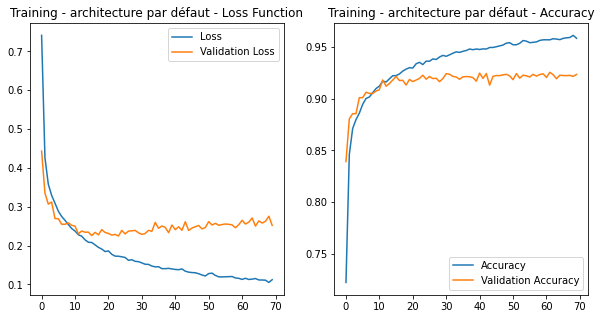

In [ ]:
to_plots((model_def[1], 'architecture par défaut')).show()

In [ ]:
print_scores(model_def[0])

Test Loss : 0.2891
Test Accuracy : 0.9176


Nous obtenons un score d'accuracy de 91.76 % ce qui est déjà bien. 
On remarque que les données sont surement overfit au delà d'une dizaine d'epochs, l'accuracy stagne sur les données de validation alors que la perte augmente. Pour résoudre ce problème on pourra essayer de rajouter quelques **Dropout** à notre architecture ou faire de la **Data augmentation**.


#### Prédictions
Penchons nous sur les prédictions en fonction des labels pour voir si certains types de vêtements sont moins bien classés que d'autres.
On commence par regarder les prédictions des 40 premiers articles.

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


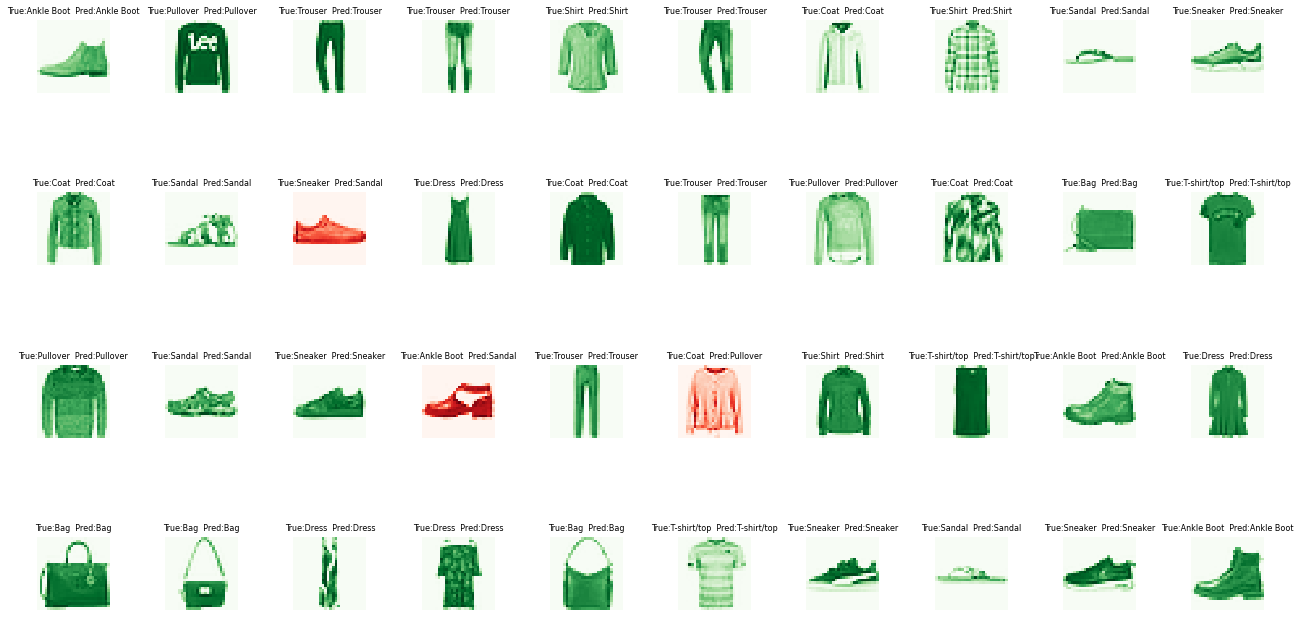

In [ ]:
# Aperçu des premières prédictions.

# Labels prédits
predicted_classes = model_def[0].predict_classes(test_images)

#Quelques traitements
correct = []
incorrect = []
true_labels = [0] * len(predicted_classes)
for i in range(len(predicted_classes)):
    true_labels[i] = np.where(test_labels[i] == 1)[0][0]
    if predicted_classes[i]==true_labels[i]:
        correct.append(i)
    else :
        incorrect.append(i)

plt.figure(figsize=(18, 10))
for i , indx in enumerate(range(n_rows*n_cols)):
    plt.subplot(n_rows, n_cols, i+1)
    if predicted_classes[i]==true_labels[i]:
        cmap = "Greens"
    else :
        cmap = "Reds"
    plt.imshow(test_images[indx].reshape(28, 28),
               interpolation="none", cmap=cmap)

    plt.title("True:{}  Pred:{}".format(labels[true_labels[indx]],labels[predicted_classes[indx]]), fontsize=8)
    plt.axis("off")
plt.tight_layout()

    

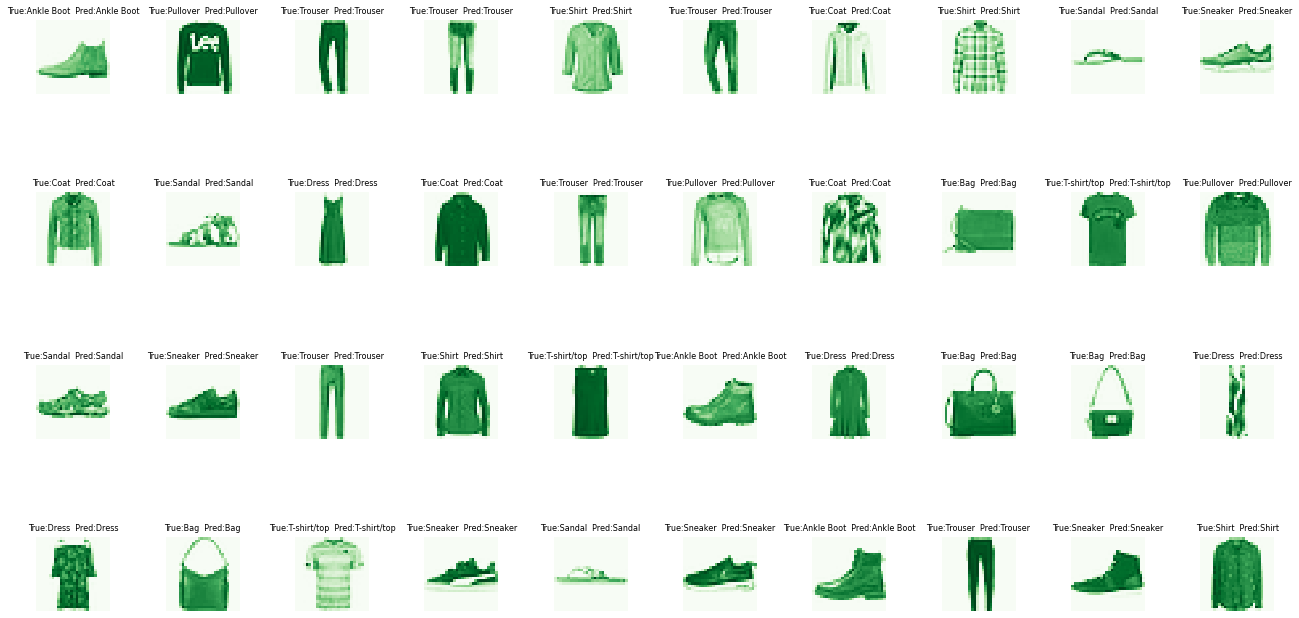

In [ ]:
def plot_images(data_index,cmap="Blues"):
    plt.figure(figsize=(18, 10))
    for i , indx in enumerate(data_index[:n_rows*n_cols]):
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(test_images[indx].reshape(28, 28),
               interpolation="none", cmap=cmap)
        plt.title("True:{}  Pred:{}".format(labels[true_labels[indx]],labels[predicted_classes[indx]]), fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    
# Seulement les bonnes prédictions  
plot_images(correct, "Greens")

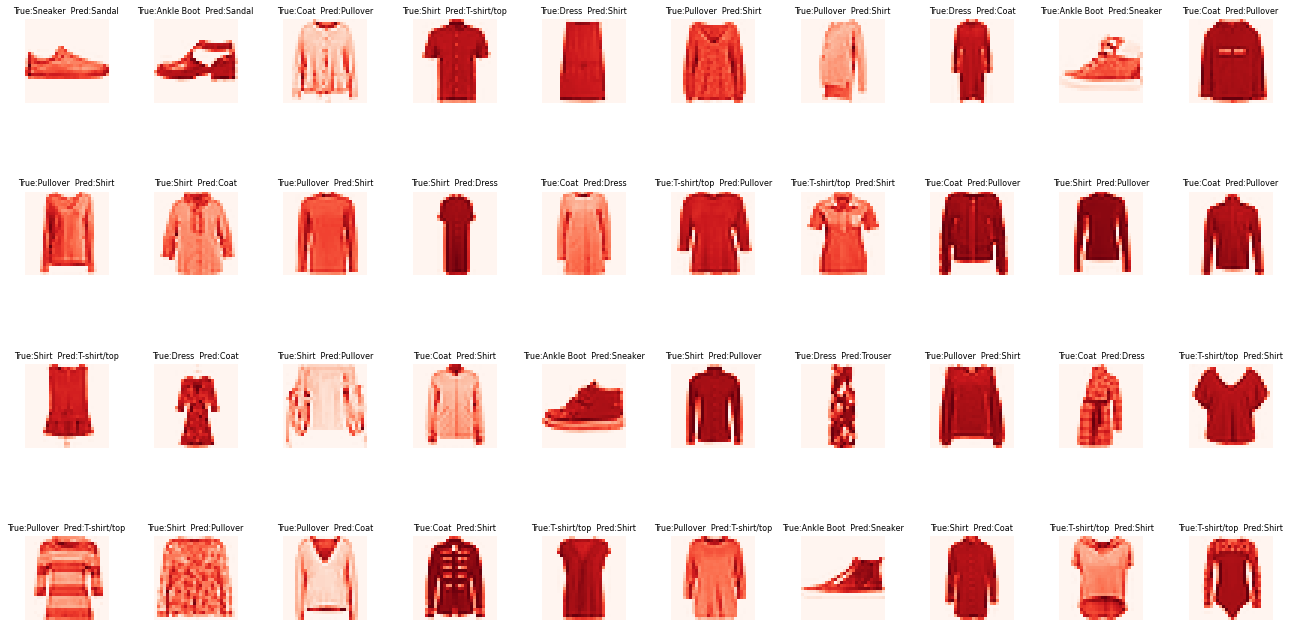

In [ ]:
# Seulement les prédictions erronées
plot_images(incorrect, "Reds")

Il semblerait que les hauts ayent plus de mal à être classé. En effet la différence entre un **Coat**, un **Shirt** ou encore un **Pullover** semble peu évidente sur ces représentation, même pour l'oeil humain. Pour vérifier cette tendance, nous allons regarder la matrice de confusion et le rappport de classification du modèle sur le jeu de test.

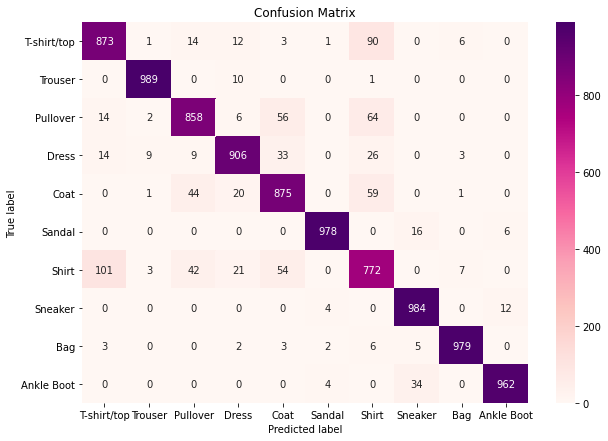

In [ ]:
#Les predictions :
prediction = model_def[0].predict(test_images)

#Matrice de confusion
text_labels = list(labels.values())

confusion = confusion_matrix(test_labels.argmax(axis=1),np.argmax(prediction,axis=1))
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion, annot=True, cmap="RdPu",fmt="d", xticklabels = text_labels, yticklabels = text_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#y_true =np.argmax(test_labels, axis=1)
from sklearn.metrics import classification_report
target_names = ["Class {} ({})".format(i, labels[i]) for i in range(num_classes)]
print(classification_report(true_labels, predicted_classes, target_names=target_names))

                       precision    recall  f1-score   support

Class 0 (T-shirt/top)       0.89      0.88      0.88      1000
    Class 1 (Trouser)       0.99      0.99      0.99      1000
   Class 2 (Pullover)       0.88      0.92      0.90      1000
      Class 3 (Dress)       0.94      0.94      0.94      1000
       Class 4 (Coat)       0.89      0.89      0.89      1000
     Class 5 (Sandal)       0.99      0.98      0.98      1000
      Class 6 (Shirt)       0.82      0.79      0.80      1000
    Class 7 (Sneaker)       0.95      0.98      0.97      1000
        Class 8 (Bag)       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot)       0.98      0.96      0.97      1000

             accuracy                           0.93     10000
            macro avg       0.93      0.93      0.93     10000
         weighted avg       0.93      0.93      0.93     10000



Dans la matrice de confusion et sur le tableau de score, on voit clairement que les catégories 0 **Tshirt** et 4 **Coat**, mais surtout 2 **Pullover** et 6 **Shirt** sont moins bien classifiées que les autres. En effet ces vetements ont des formes très semblables, comme nous avons pu le voir. 


Comment améliorer le modèle alors ? 
Nous allons explorer plusieurs pistes :


*   Le changement de paramètres
*   Le changement d'architecture
*   La data augmentation (ou agmentation des données en francais) grâce à des astuces.

## Changement des paramètres

### Batch Size

Nous avons entraîné le modèle initial avec une taille de batch de 128. Or nous pouvons nous permettre (ce notebook étant exécuté sur Colab) de prendre une taille _légèrement_ plus grande. Ici nous somme passé à une taille de 4096.

In [ ]:
model_cnn = default_model()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
cnn = run_cnn(
    model_cnn,
    batch_size=4096,
    )

In [ ]:
save_cnn(model_cnn, cnn, "def_batch")

In [ ]:
cnn = load_cnn("def_batch")

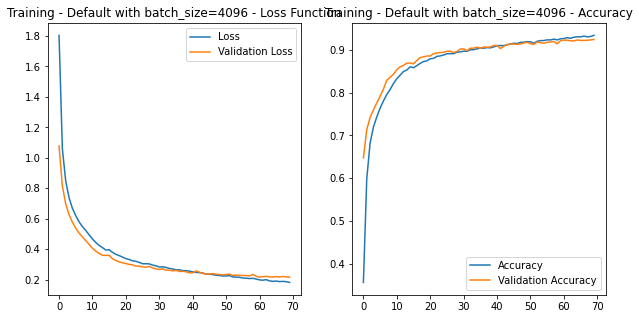

In [ ]:
to_plots((cnn[1], "Default with batch_size=4096")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2334
Test Accuracy : 0.9168
--- Diff --- 
Loss :         -0.0557
Accuracy :     -0.0008


C'est moins efficace qu'avec un batch plus petit.

### Early-Stopping

Dans la dernière sous-partie, nous avons pu appercevoir des perturbations, ce qui pourrait indiqué qu'un early-stopping soit utile.

In [ ]:
model_cnn = default_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
cnn = run_cnn(
    model_cnn,
    batch_size=4096,
    early_stopping=EarlyStopping(
        monitor='val_accuracy', min_delta=0.0001,
        patience=3
        )
    )

In [ ]:
save_cnn(model_cnn, cnn, "def_batch_es")

In [ ]:
cnn = load_cnn("def_batch_es")

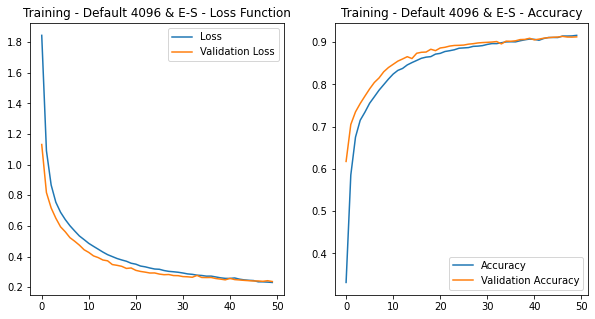

In [ ]:
to_plots((cnn[1], "Default 4096 & E-S")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2534
Test Accuracy : 0.9087
--- Diff --- 
Loss :         -0.0358
Accuracy :     -0.0089


Pour ce modèle ce n'est pas efficace.

### Dropout rate

Maintenant, comme nous avons constaté un problème d'overfitting dans le modèle initial dès l'époque ~30, nous allons augmenter le dropout rate de plusieurs couches.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.5, name='dropout_2')) # ici
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.5, name='dropout_3')) # ici
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(256, activation='relu', name='dense'))
model_cnn.add(Dropout(0.5, name='dropout_4'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
cnn = run_cnn(model_cnn)

In [ ]:
save_cnn(model_cnn, cnn, "param1")

In [ ]:
cnn = load_cnn("param1")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2432
Test Accuracy : 0.9147
--- Diff --- 
Loss :         -0.0459
Accuracy :     -0.0029


On remarque qu'augmenter le dropout rate nous fais perdre en loss mais aussi en précision.

### Ajustement de la couche dense

On va essayer cette fois d'augmenter la taille de la couche dense en pré-sortie, ce qui pourrait affiner les résultats.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.25, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(4096, activation='relu', name='dense'))
model_cnn.add(Dropout(0.5, name='dropout_4'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
cnn = run_cnn(model_cnn)

In [ ]:
save_cnn(model_cnn, cnn, "param2")

In [ ]:
cnn = load_cnn("param2")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.3147
Test Accuracy : 0.9159
--- Diff --- 
Loss :         +0.0256
Accuracy :     -0.0017


Encore une fois, pas très convainquant et un plus important overfitting.


### Kernel Size

Nous allons changer la taille du premier kernel et observer le comportement.

In [ ]:
model_cnn = Sequential()
# première couche avec kernel plus grand
model_cnn.add(Conv2D(64, kernel_size=(7, 7), activation='relu', input_shape=input_shape, name='conv2d_1', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.25, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(256, activation='relu', name='dense'))
model_cnn.add(Dropout(0.5, name='dropout_4'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)       

In [ ]:
cnn = run_cnn(model_cnn)

In [ ]:
save_cnn(model_cnn, cnn, "param_kernel")

In [ ]:
cnn = load_cnn("param_kernel")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.3072
Test Accuracy : 0.9162
--- Diff --- 
Loss :         +0.0180
Accuracy :     -0.0014


Ce changement à produit des résultats moins bons sur les 2 critères.

### Stride

Ajoutons un stride aux convolutions cette fois-ci.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=input_shape, name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.25, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(256, activation='relu', name='dense'))
model_cnn.add(Dropout(0.5, name='dropout_4'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
cnn = run_cnn(model_cnn)

In [ ]:
save_cnn(model_cnn, cnn, "param3")

In [ ]:
cnn = load_cnn("param3")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2964
Test Accuracy : 0.9175
--- Diff --- 
Loss :         +0.0072
Accuracy :     -0.0001


On ne remarque pas de grande différence si ce n'est une moins bonne perte.

### Mixin

Essayons de faire une combinaison de tout ceci.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.25, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(4096, activation='relu', name='dense'))
model_cnn.add(Dropout(0.5, name='dropout_4'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)       

In [ ]:
cnn = run_cnn(model_cnn)

In [ ]:
save_cnn(model_cnn, cnn, "param4")

In [ ]:
cnn = load_cnn("param4")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2631
Test Accuracy : 0.9093
--- Diff --- 
Loss :         -0.0261
Accuracy :     -0.0083


De façon non surprenante, nos résultats ne sont toujours pas convainquants.

### Conclusion

Il semblerait, de toute évidence, que le modèle donné en énoncé est bien paramétré. Nous n'avons pas trouvé de paramétrage qui nous donne un meilleur résultat.

## Autres architectures

Dans cette partie, nous allons jouer avec l'architecture en plus des paramètres de celle qui a été donnée en énoncé.

### Exhibit A

Nous  allons d'abord ajouter une couche en pré-sortie. Le premier CNN présenté s'est vu ajouté une couche dense de taille 1024 avec activation Softmax. Ce qui n'est pas une bonne fonction dans le cas présent. Cette architecture a été gardée pour son graphe d'historique qui a un aspect rigolo.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.25, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(256, activation='relu', name='dense'))
model_cnn.add(Dropout(0.5, name='dropout_4'))
model_cnn.add(Dense(1024, activation='softmax', name='pre-output'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
history_cnn = run_cnn(model_cnn)

Le-dit graphe ci-dessous. Son apparence en escalier s'explique sans doute par le fait que la dernière couche doit prendre le temps d'apprendre à interpréter la sortie du softmax précédent.

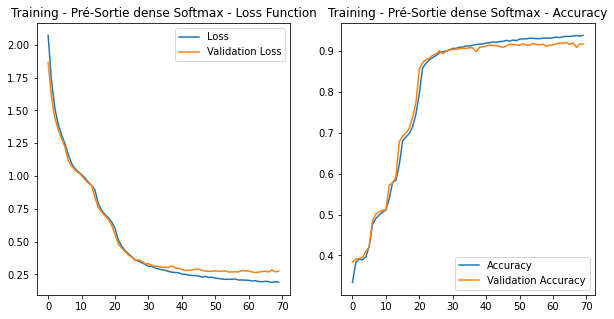

In [ ]:
to_plots((history_cnn.history, "Pré-Sortie dense Softmax")).show()

In [ ]:
save_cnn(model_cnn, history_cnn, "softmax_preoutput")

In [ ]:
cnn = load_cnn("softmax_preoutput")

On voit que ça ne change pas grand chose aux performances par rapport à l'architecture initiale:

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2896
Test Accuracy : 0.9126
--- Diff --- 
Loss :         +0.0004
Accuracy :     -0.0050



### Exhibit B

Ici on va remplacer la fonction d'activation de la-dite nouvelle couche par la fonction ReLu et augmenter la taille de la couche précédente à 1024.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.25, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(1024, activation='relu', name='dense'))
model_cnn.add(Dense(1024, activation='relu', name='pre-output'))
model_cnn.add(Dropout(0.5, name='dropout5'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
history_cnn = run_cnn(model_cnn)

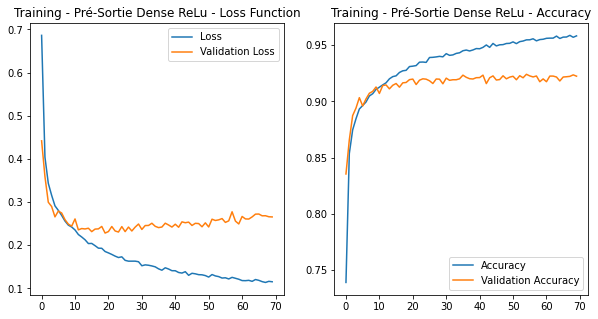

In [ ]:
to_plots((history_cnn.history, "Pré-Sortie Dense ReLu")).show()

In [ ]:
save_cnn(model_cnn, history_cnn, "relu_preoutput_1024")

In [ ]:
cnn = load_cnn("relu_preoutput_1024")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2933
Test Accuracy : 0.9215
--- Diff --- 
Loss :         +0.0042
Accuracy :     +0.0039


Encore une fois, on a un résultat similaire, quoique marginalement supérieur en précision et de même inférieur en perte.

### Exhibit C

Ici la couche dense avant la pré-sortie est augmentée à 4096.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.5, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(4096, activation='relu', name='dense'))
model_cnn.add(Dense(1024, activation='relu', name='pre-output'))
model_cnn.add(Dropout(0.5, name='dropout5'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
history_cnn = run_cnn(model_cnn)

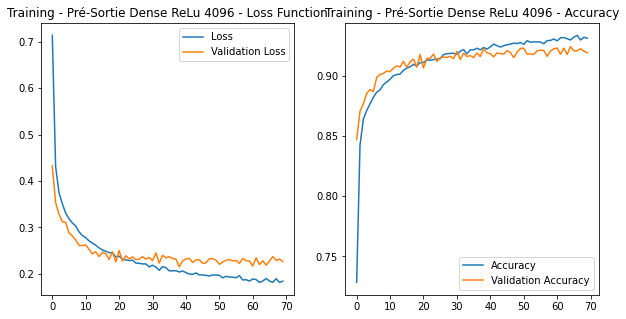

In [ ]:
to_plots((history_cnn.history, "Pré-Sortie Dense ReLu 4096")).show()

In [ ]:
save_cnn(model_cnn, history_cnn, "relu_preoutput_4096")

In [ ]:
cnn = load_cnn("relu_preoutput_4096")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2488
Test Accuracy : 0.9177
--- Diff --- 
Loss :         -0.0404
Accuracy :     +0.0001


On peut voir que cette architecture nous donne une meilleure perte mais rien de différent sur la précisison

### Exhibit D

On garde l'architecture de `Exhibit B` et on ajoute un couche de convolution au début du modèle.

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1b'))
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.5, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(1024, activation='relu', name='dense'))
model_cnn.add(Dense(1024, activation='relu', name='pre-output'))
model_cnn.add(Dropout(0.5, name='dropout5'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1b (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)       

In [ ]:
history_cnn = run_cnn(model_cnn)

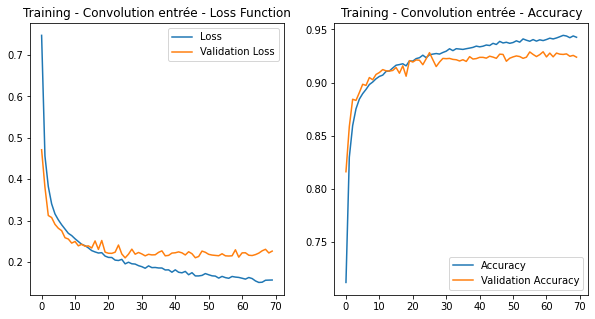

In [ ]:
to_plots((history_cnn.history, "Convolution entrée")).show()

In [ ]:
save_cnn(model_cnn, history_cnn, "convolution")

In [ ]:
cnn = load_cnn("convolution")

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2424
Test Accuracy : 0.9252
--- Diff --- 
Loss :         -0.0468
Accuracy :     +0.0076


On constate une meilleure précision et meilleure perte non marginale. Il semblerait que ce soit la bonne piste !

### Exhibit E

Fort de notre succès précédent, nous allons ajouter tout un tas de convolutions.

On notera que l'on va mettre un padding `same` car sinon nos entrées seraient trop petites pour être traîtées par notre CNN. 

In [ ]:
model_cnn = Sequential([Conv2D(64, (5, 5), input_shape=input_shape, padding='same', activation='relu'), 
                       Conv2D(64, (5, 5), activation='relu', padding='same'), 
                       MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                       Dropout(0.25),
                       Conv2D(128, (5, 5), activation='relu', padding='same'), 
                       Conv2D(128, (5, 5), activation='relu', padding='same'), 
                       MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), 
                       Dropout(0.25),
                       Conv2D(256, (3, 3), activation='relu', padding='same'),  
                       Conv2D(256, (3, 3), activation='relu', padding='same'), 
                       Conv2D(256, (3, 3), activation='relu', padding='same'),  
                       MaxPooling2D(pool_size=(2, 2)),
                       Dropout(0.25),
                       Conv2D(512, (3, 3), activation='relu', padding='same'), 
                       Conv2D(512, (3, 3), activation='relu', padding='same'),  
                       Conv2D(512, (3, 3), activation='relu', padding='same'),  
                       MaxPooling2D(pool_size=(2, 2)),
                       Dropout(0.25),
                       Flatten(),                          # Convert 3D matrices into 1D vector
                       Dense(1024, activation='relu'),     # Add Fully-connected layers
                       Dense(1024, activation='relu'),
                       Dropout(0.25),
                       Dense(10, activation='softmax')   # Final Fully-connected layer for predictions
                      ])

model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 128)       

In [ ]:
history_cnn = run_cnn(model_cnn)

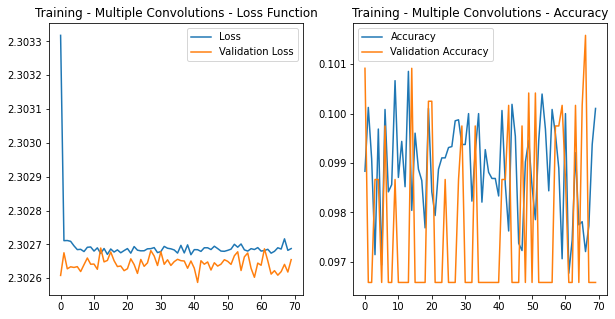

In [ ]:
to_plots((history_cnn.history, "Multiple Convolutions")).show()

On se rend compte qu'il y a un problème de convergence, peut-être avons nous une taille de mini-batch trop faible pour la descente de gradient? Essayons avec des mini-batch de taille 4096.

In [ ]:
history_cnn = run_cnn(model_cnn, batch_size=4096)

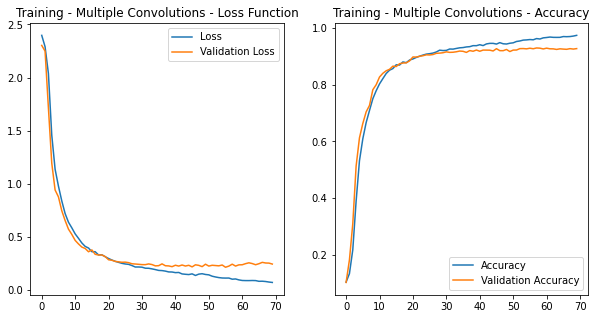

In [ ]:
to_plots((history_cnn.history, "Multiple Convolutions")).show()

In [ ]:
save_cnn(model_cnn, history_cnn, "many_convolution")

In [ ]:
cnn = load_cnn("many_convolution")
cnn2 = load_cnn("convolution")

In [ ]:
compare_scores(model_def[0], cnn[0], cnn2("convolution")[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2646
Test Accuracy : 0.9230
--- Diff --- 
Loss :         -0.0246
Accuracy :     +0.0054
=== model 1 === 
--- Score ---
Test Loss :     0.2424
Test Accuracy : 0.9252
--- Diff --- 
Loss :         -0.0468
Accuracy :     +0.0076


On se rend compte que ce modèle (`0`) est, bien que de peu, moins bon que le précédent (`1`).

In [ ]:
Augmentons la taille des couches denses:

In [ ]:
model_cnn = Sequential([Conv2D(64, (5, 5), input_shape=input_shape, padding='same', activation='relu'), 
                       Conv2D(64, (5, 5), activation='relu', padding='same'), 
                       MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                       Dropout(0.25),
                       Conv2D(128, (5, 5), activation='relu', padding='same'), 
                       Conv2D(128, (5, 5), activation='relu', padding='same'), 
                       MaxPooling2D(pool_size=(2, 2), strides=(2, 2)), 
                       Dropout(0.25),
                       Conv2D(256, (3, 3), activation='relu', padding='same'),  
                       Conv2D(256, (3, 3), activation='relu', padding='same'), 
                       Conv2D(256, (3, 3), activation='relu', padding='same'),  
                       MaxPooling2D(pool_size=(2, 2)),
                       Dropout(0.25),
                       Conv2D(512, (3, 3), activation='relu', padding='same'), 
                       Conv2D(512, (3, 3), activation='relu', padding='same'),  
                       Conv2D(512, (3, 3), activation='relu', padding='same'),  
                       MaxPooling2D(pool_size=(2, 2)),
                       Dropout(0.25),
                       Flatten(),                          # Convert 3D matrices into 1D vector
                       Dense(2048, activation='relu'),     # Add Fully-connected layers
                       Dense(2048, activation='relu'),
                       Dropout(0.5),
                       Dense(10, activation='softmax')   # Final Fully-connected layer for predictions
                      ])

model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 14, 14, 128)       409728    
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 7, 7, 128)       

In [ ]:
history_cnn = run_cnn(model_cnn, batch_size=4096)

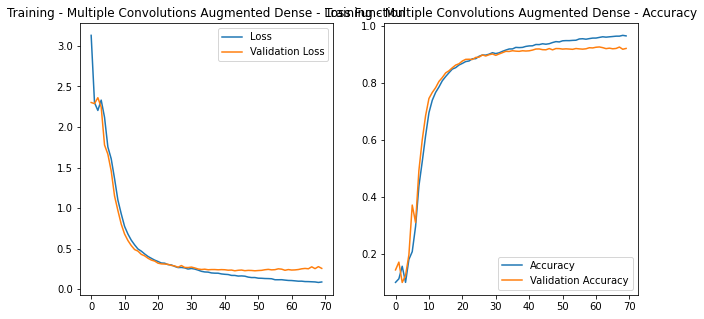

In [ ]:
to_plots((history_cnn.history, "Multiple Convolutions Augmented Dense")).show()

In [ ]:
save_cnn(model_cnn, history_cnn, "many_convolution_dense")

In [ ]:
cnn = load_cnn("many_convolution_dense")
cnn2 = load_cnn("many_convolution")
cnn3 = load_cnn("convolution")

In [ ]:
compare_scores(model_def[0], cnn[0], cnn2[0], cnn3[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2726
Test Accuracy : 0.9225
--- Diff --- 
Loss :         -0.0165
Accuracy :     +0.0049
=== model 1 === 
--- Score ---
Test Loss :     0.2646
Test Accuracy : 0.9230
--- Diff --- 
Loss :         -0.0246
Accuracy :     +0.0054
=== model 2 === 
--- Score ---
Test Loss :     0.2424
Test Accuracy : 0.9252
--- Diff --- 
Loss :         -0.0468
Accuracy :     +0.0076


Il n'y a rien à faire, le premier modèle d'`Exhibit D` est toujours le meilleur.

### Pour résumer

La meilleure altération du modèle initial que nous avons pu tester consiste à ajouter une couche de convolution en première couche (voir `Exhibit D`)

## Data augmentation

Une autre solution pour éviter l'overfit est l'augmentation des données via quelques astuces. Ici nous allons quadrupler la taille des données d'entrainement en augmentant le contraste et en renversant les images initiales.


In [ ]:
#On charge a nouveau les donnees
(train_images2, train_labels2), (test_images2, test_labels2) = fashion_mnist.load_data()
train_images2, val_images2, train_labels2, val_labels2 = train_test_split(train_images2,train_labels2, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
#On les process, sauf le set train

if K.image_data_format() == 'channels_first':
    train_images2 = train_images2.reshape(train_images2.shape[0], 1, img_rows, img_cols)
    val_images2 = val_images2.reshape(val_images2.shape[0], 1, img_rows, img_cols)
    test_images2 = test_images2.reshape(test_images2.shape[0], 1, img_rows, img_cols)
    input_shape2 = (1, img_rows, img_cols)
else:
    train_images2 = train_images2.reshape(train_images2.shape[0], img_rows, img_cols, 1)
    val_images2 = val_images2.reshape(val_images2.shape[0], img_rows, img_cols, 1)
    test_images2 = test_images2.reshape(test_images2.shape[0], img_rows, img_cols, 1)
    input_shape2 = (img_rows, img_cols, 1)

val_images2 = val_images2.astype('float32')
test_images2 = test_images2.astype('float32')

test_images2 /= test_images2.max()
val_images2 /= val_images2.max()

val_labels2 = to_categorical(val_labels2, num_classes)
test_labels2 = to_categorical(test_labels2, num_classes)

In [ ]:
from tensorflow.image import flip_left_right
from tensorflow.image import adjust_contrast

On définit notre fonction d'augmentation.

In [ ]:
def data_augmentation (data_img, data_lab):
    lr = flip_left_right(data_img) # miroir axe vertial
    acplus = adjust_contrast(data_img, 1.5) # contrast
    acplus_lr = adjust_contrast(lr, 1.5) # contrast du miroir
    res_img = np.concatenate((data_img,lr, acplus, acplus_lr), axis = 0)
    res_lab = np.concatenate((data_lab, data_lab, data_lab,data_lab) , axis = 0)
    return res_img, res_lab


In [ ]:
new_trainI , new_trainL = data_augmentation(train_images2, train_labels2)

Ce qui nous donne pour chaque image initiale ces 4 représentations:


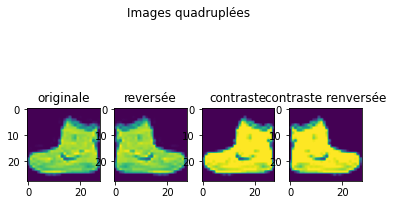

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Images quadruplées')
ax1.imshow(new_trainI[0].reshape(28,28))
ax1.set_title("originale")
ax2.imshow(new_trainI[48000].reshape(28,28))
ax2.set_title("reversée")
ax3.imshow(new_trainI[96000].reshape(28,28))
ax3.set_title("contraste")
ax4.imshow(new_trainI[144000].reshape(28,28))
ax4.set_title("contraste renversée")
plt.show()

In [ ]:
#On normalise :
new_trainI = new_trainI.astype('float32')
new_trainI /= new_trainI.max()
new_trainL = to_categorical(new_trainL, num_classes)

### Modèle de l'énoncé

On va commencer par utiliser le modèle donné en énoncé:

#### Premier entraînement

In [ ]:
model_cnn = default_model()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)       

In [ ]:
cnn = run_cnn(model_cnn, train_images=new_trainI, train_labels=new_trainL)

In [ ]:
save_cnn(model_cnn, cnn, "augmentation1")

In [ ]:
cnn = load_cnn("augmentation1")

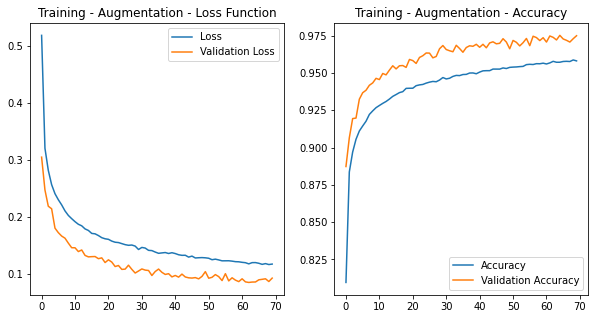

In [ ]:
to_plots((cnn[1], "Augmentation")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2690
Test Accuracy : 0.9203
--- Diff --- 
Loss :         -0.0201
Accuracy :     +0.0027


On constate ici une amélioration sur l'ensemble des critères de test.

#### Plus grande taille de batch

Ayant constaté des perturbations sur la courbe historique du modèle pour ce jeu de donnée, nous allons augmenter la taille des mini-batchs

In [ ]:
model_cnn = default_model()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
cnn = run_cnn(model_cnn, train_images=new_trainI, train_labels=new_trainL, batch_size=4096)

In [ ]:
save_cnn(model_cnn, cnn, "augmentation1_batch")

In [ ]:
cnn = load_cnn("augmentation1_batch")

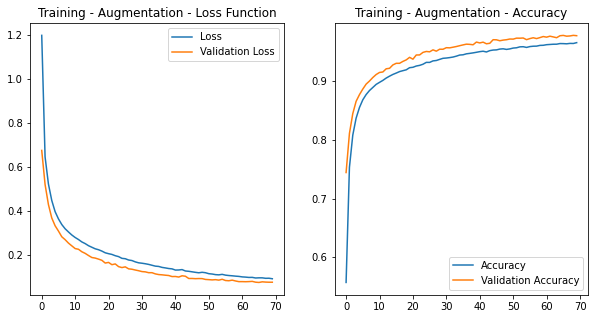

In [ ]:
to_plots((cnn[1], "Augmentation")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2424
Test Accuracy : 0.9281
--- Diff --- 
Loss :         -0.0468
Accuracy :     +0.0105


Changer la taille des mini-batch est ici judicieux et nous apporte de bien meilleurs prédictions.

### Avec le meilleur modèle de `Autres architectures`

On va utilisé le meilleur modèle que nous avons pu tester sur le dataset initial, c'est à dire le modèle de la sous partie `Exhibit B` de `Autres Architectures`, soit le modèle avec une convolution supplémentaire en entrée.

#### Premier entraînement

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1b'))
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.5, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(1024, activation='relu', name='dense'))
model_cnn.add(Dense(1024, activation='relu', name='pre-output'))
model_cnn.add(Dropout(0.5, name='dropout5'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1b (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)       

In [ ]:
cnn = run_cnn(model_cnn, train_images=new_trainI, train_labels=new_trainL)

In [ ]:
save_cnn(model_cnn, cnn, "augmentation2")

In [ ]:
cnn = load_cnn("augmentation2")

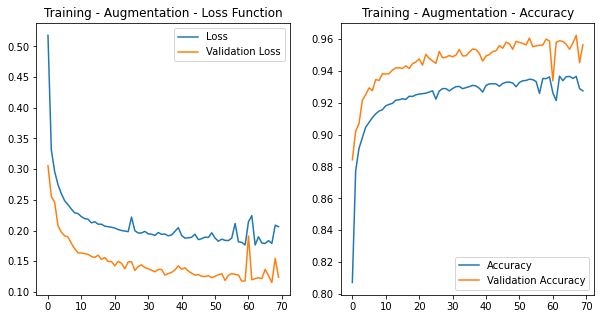

In [ ]:
to_plots((cnn[1], "Augmentation")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2384
Test Accuracy : 0.9250
--- Diff --- 
Loss :         -0.0508
Accuracy :     +0.0074


On remarque qu'il y a de violentes perturbations au bout de 25 itérations, peut-être qu'un batch size plus grand et peut-être un early-stopping serait judicieux.

#### Plus grande taille de batch

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1b'))
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.5, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(1024, activation='relu', name='dense'))
model_cnn.add(Dense(1024, activation='relu', name='pre-output'))
model_cnn.add(Dropout(0.5, name='dropout5'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'],
                  )

model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1b (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 128)        

In [ ]:
cnn = run_cnn(
    model_cnn,
    batch_size=4096,
    train_images=new_trainI,
    train_labels=new_trainL,
    )

In [ ]:
save_cnn(model_cnn, cnn, "augmentation2_batch")

In [ ]:
cnn = load_cnn("augmentation2_batch")

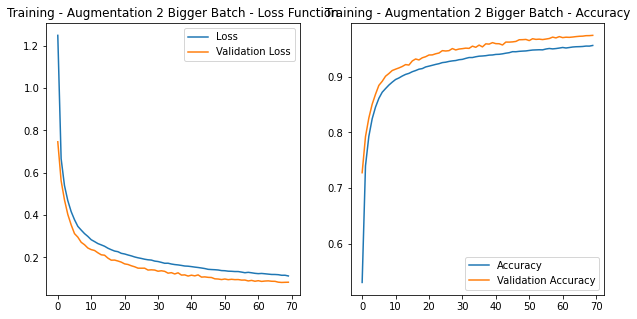

In [ ]:
to_plots((cnn[1], "Augmentation 2 Bigger Batch")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

=== reference === 
Test Loss :     0.2891
Test Accuracy : 0.9176
=== model 0 === 
--- Score ---
Test Loss :     0.2256
Test Accuracy : 0.9304
--- Diff --- 
Loss :         -0.0635
Accuracy :     +0.0128


On a quelque chose de mieux sur l'ensemble des 2 critères de test. Qu'en serait-il avec un early-stopping en plus ?

#### Early-stopping

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(5, 5), input_shape=input_shape, activation='relu', name='conv2d_1b'))
model_cnn.add(Conv2D(64, kernel_size=(5, 5), activation='relu', name='conv2d_1'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_1'))
model_cnn.add(Dropout(0.25, name='dropout_1'))
model_cnn.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), activation='relu', name='conv2d_2'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_2'))
model_cnn.add(Dropout(0.5, name='dropout_2'))
model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv2d_3'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2), name='max_pool_3'))
model_cnn.add(Dropout(0.25, name='dropout_3'))
model_cnn.add(Flatten(name='flatten'))
model_cnn.add(Dense(1024, activation='relu', name='dense'))
model_cnn.add(Dense(1024, activation='relu', name='pre-output'))
model_cnn.add(Dropout(0.5, name='dropout5'))
model_cnn.add(Dense(num_classes, activation='softmax', name='output'))
                    
model_cnn.compile(loss=losses.categorical_crossentropy,
                  optimizer=optimizers.Adam(),
                  metrics=['accuracy'],
                  )

model_cnn.summary()

NameError: ignored

In [ ]:
cnn = run_cnn(
    model_cnn,
    batch_size=4096,
    train_images=new_trainI,
    train_labels=new_trainL,
    early_stopping=EarlyStopping(
        monitor='val_accuracy',
        min_delta=0.0001,
        patience=2)
    )

NameError: ignored

In [ ]:
save_cnn(model_cnn, cnn, "augmentation2_earlystop")

In [ ]:
cnn = load_cnn("augmentation2_earlystop")

In [ ]:
to_plots((cnn[1], "Augmentation 2 + earlystopping")).show()

In [ ]:
compare_scores(model_def[0], cnn[0])

Nous avons ici __le__ meilleur résultat et donc modèle.

### Conclusion & Analyse

Nous allons ici comparer le "meilleur CNN", entraîné sur le dataset augmenté, au modèle de référence initial sur le dataset simple.


In [ ]:
cnn = load_cnn("augmentation2_earlystop")

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


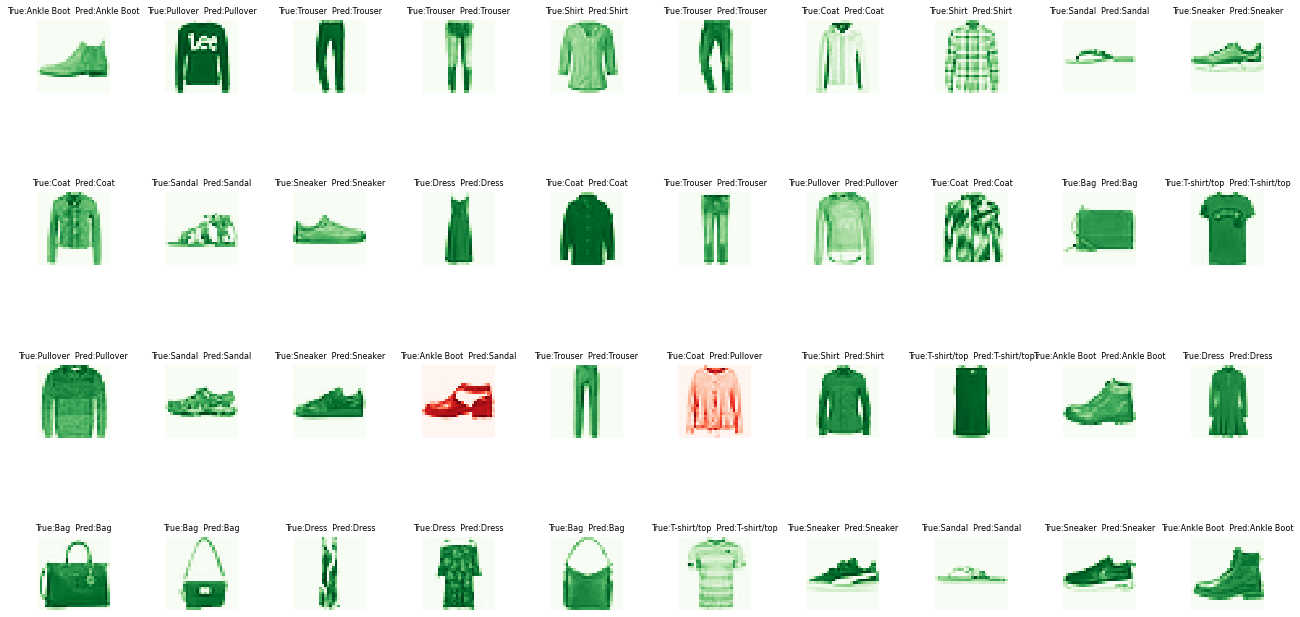

In [ ]:
# Aperçu des premières prédictions.

# Labels prédits
predicted_classes = cnn[0].predict_classes(test_images)

#Quelques traitements
correct = []
incorrect = []
true_labels = [0] * len(predicted_classes)
for i in range(len(predicted_classes)):
    true_labels[i] = np.where(test_labels[i] == 1)[0][0]
    if predicted_classes[i]==true_labels[i]:
        correct.append(i)
    else :
        incorrect.append(i)

plt.figure(figsize=(18, 10))
for i , indx in enumerate(range(n_rows*n_cols)):
    plt.subplot(n_rows, n_cols, i+1)
    if predicted_classes[i]==true_labels[i]:
        cmap = "Greens"
    else :
        cmap = "Reds"
    plt.imshow(test_images[indx].reshape(28, 28),
               interpolation="none", cmap=cmap)

    plt.title("True:{}  Pred:{}".format(labels[true_labels[indx]],labels[predicted_classes[indx]]), fontsize=8)
    plt.axis("off")
plt.tight_layout()

    

Dans ces images présentées, nous pouvons déjà bien identifier la sneaker en position (2, 3), coordonnées matricielles, ce qui n'etait pas le cas au début de ce notebook. Ceci est sûrement dû au dataset augmenté qui a introduit des images de chaussures dans les 2 sens, or le sens "chaussure pointe vers la droite" était intialement peu représenté. Maintenant les 2 sens sont equiprésents.

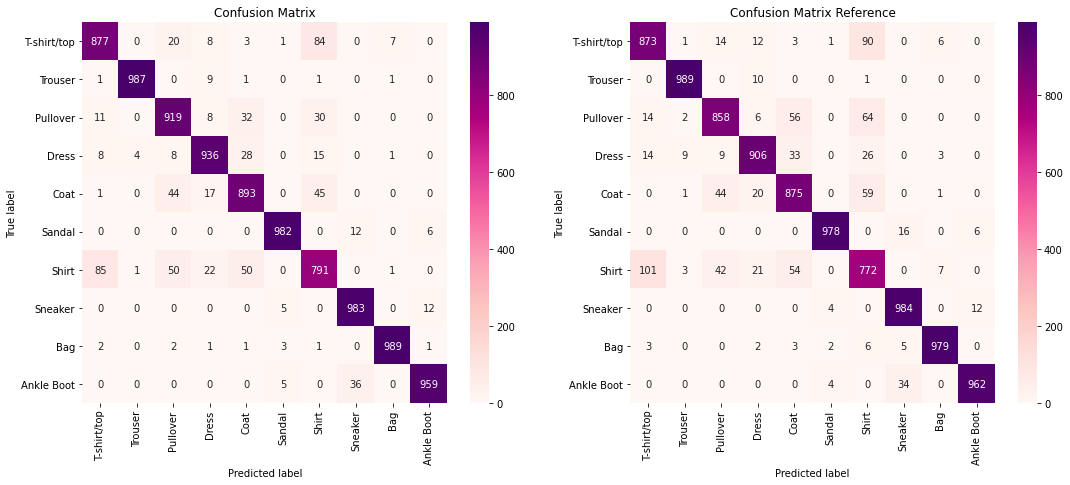

In [ ]:
#Les predictions :
prediction_ref = model_def[0].predict(test_images)
prediction = cnn[0].predict(test_images)

#Matrice de confusion
text_labels = list(labels.values())

confusion = confusion_matrix(test_labels.argmax(axis=1),np.argmax(prediction,axis=1))
plt.figure(figsize = (18,7))
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix')
sns.heatmap(confusion, annot=True, cmap="RdPu",fmt="d", xticklabels = text_labels, yticklabels = text_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')

confusion = confusion_matrix(test_labels.argmax(axis=1),np.argmax(prediction_ref,axis=1))
plt.subplot(1, 2, 2)
plt.title('Confusion Matrix Reference')
sns.heatmap(confusion, annot=True, cmap="RdPu",fmt="d", xticklabels = text_labels, yticklabels = text_labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [ ]:
predicted_classes = cnn[0].predict_classes(test_images)
predicted_classes_ref = model_def[0].predict_classes(test_images)

print("=== Best CNN ===")
print(classification_report(true_labels, predicted_classes, target_names=target_names))
print("=== Reference ===")
print(classification_report(true_labels, predicted_classes_ref, target_names=target_names))


=== Best CNN ===
                       precision    recall  f1-score   support

Class 0 (T-shirt/top)       0.89      0.88      0.88      1000
    Class 1 (Trouser)       0.99      0.99      0.99      1000
   Class 2 (Pullover)       0.88      0.92      0.90      1000
      Class 3 (Dress)       0.94      0.94      0.94      1000
       Class 4 (Coat)       0.89      0.89      0.89      1000
     Class 5 (Sandal)       0.99      0.98      0.98      1000
      Class 6 (Shirt)       0.82      0.79      0.80      1000
    Class 7 (Sneaker)       0.95      0.98      0.97      1000
        Class 8 (Bag)       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot)       0.98      0.96      0.97      1000

             accuracy                           0.93     10000
            macro avg       0.93      0.93      0.93     10000
         weighted avg       0.93      0.93      0.93     10000

=== Reference ===
                       precision    recall  f1-score   support

Class 0 (T-shirt

Nous remarquons que la précision et rappel sont légèrement moins bons pour les `Pullovers` dans le "meilleur CNN", mais supérieurs partout ailleurs. On constate une énorme amélioration sur la reconnaissance des `Shirts`(Chemises). 

Par ailleurs, sur l'ensemble des `f1-score`, nous avons un score égal ou plus important avec le "meilleur CNN" et dataset augmenté que l'initial et dataset simple. 

## Conclusion

Nous avons testé plusieurs modèles, analysé leurs comportements sous différents critères et inféré des décisions pour les améliorer.

Nous avons vu que le modèle proposé était bien paramétré et donc non améliorable par d'éventuels ajustements de paramètres.

Par l'augmentation du dataset, nous avons pû régler quelques problèmes de biais notament dû à une orientation peu présente ou un trop faible contraste, ce qui nous a permis une amélioration dans les résultars de prédictions.

Nous avons pu obtenir de meilleurs prédictions en ajoutant une convolution supplémentaire.

Dans l'ensemble, nous dégageons de ce devoir que la préparation des données est, encore une fois, aussi importante que la réflexion sur l'outil à utiliser pour les traîter. 